In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tflearn

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
Scipy not supported!


In [2]:
# Data loading and preprocessing

import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
# autoencoder model

level_1_size = 128
decoder_size = 64
activation_function = 'linear' # relu
loss_func = 'mean_square' # categorical_crossentropy

# input tensor (2d)
input_data = tflearn.input_data(shape=[None, 784])

# encoder
fc_level_1 = tflearn.fully_connected(input_data, level_1_size, activation=activation_function)
encoder_fc_level_2 = tflearn.fully_connected(fc_level_1, decoder_size, activation=activation_function)

# decoder
fc1_level_3 = tflearn.fully_connected(encoder_fc_level_2, level_1_size, activation=activation_function)
decoder_fc_level_4 = tflearn.fully_connected(fc1_level_3, 784, activation=activation_function)

# define metrics (Accuracy)
metrics = tflearn.metrics.Top_k (k=3, name='autoencoder_metrics')

# net config
net = tflearn.regression(decoder_fc_level_4, 
                         optimizer='adam', 
                         learning_rate=0.001, 
                         loss=loss_func, 
                         metric=metrics)

# DNN autoencoder model
model = tflearn.DNN(net, tensorboard_verbose=0)


In [4]:
# model train

model.fit(X, X, 
          n_epoch=10, 
          validation_set=(testX, testX), 
          run_id='auto_encoder', 
          batch_size=256)


Training Step: 2149  | total loss: 0.01357 | time: 1.725s
| Adam | epoch: 010 | loss: 0.01357 -- iter: 54784/55000
Training Step: 2150  | total loss: 0.01334 | time: 2.738s
| Adam | epoch: 010 | loss: 0.01334 | val_loss: 0.01142 -- iter: 55000/55000
--


In [6]:
# encoding example

encoding_model = tflearn.DNN(encoder_fc_level_2, session=model.session)
p = encoding_model.predict([X[0]])
# print(p)

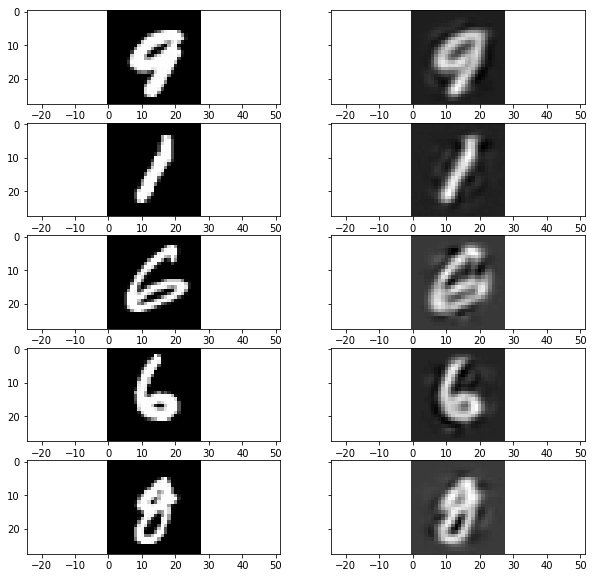

In [7]:
# encoding / decoding visualize results

# reshuffle data
testX = tflearn.data_utils.shuffle(testX)[0]

# encode / decode
encode_decode = model.predict(testX)

cols = 2
rows = 5

plt.close('all')
f, ax = plt.subplots(rows, cols, sharey=True, figsize=(10, 10))

for i in range(rows):
    pixels_origin = np.reshape(testX[i], (28, 28))
    ax[i][0].imshow(pixels_origin, cmap='gray')
    pixels_decoded = np.reshape(encode_decode[i], (28, 28))
    ax[i][1].imshow(pixels_decoded, cmap='gray')

plt.show()
